In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
features = "C:\\Users\\danie\\OneDrive\\Área de Trabalho\\Python BRAIN\\Repotório github\\Teste\\Desafios\\Titanic\\data\\train.csv"
survived = "C:\\Users\\danie\\OneDrive\\Área de Trabalho\\Python BRAIN\\Repotório github\\Teste\\Desafios\\Titanic\\data\\gender_submission.csv"
# with open(features, 'r') as arquivo:
#     conteudo = arquivo.read()
#     print(conteudo)

In [3]:
tf = pd.read_csv(features)
X = tf[["Pclass", "Age", "Fare"]]
y = tf["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [4]:
# bool_series = pd.isnull(tf["Cabin"])

# tf_interpolated = tf.interpolate(method='linear', limit_direction='both')

# string_columns = tf_interpolated.select_dtypes(include=['object']).columns

# tf_interpolated[string_columns] = tf_interpolated[string_columns].fillna(tf_interpolated[string_columns].mode().iloc[0])

# print(tf_interpolated)

In [5]:
age_mean = tf["Age"].mean()

tf["Age"].fillna(age_mean, inplace=True)

string_columns = tf.select_dtypes(include=['object']).columns

tf[string_columns] = tf[string_columns].fillna(tf[string_columns].mode().iloc[0])

# print(tf) 



C:\Users\danie\AppData\Local\Temp\ipykernel_10844\195207232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tf["Age"].fillna(age_mean, inplace=True)


In [6]:
# tf_cleaned = tf.dropna(subset=['Cabin'])

# stf_cleaned = tf_cleaned[tf_cleaned['Cabin'] != 'B96 B98']

In [7]:
# import re
# import numpy as np

# def cabin_to_numeric(cabin):
#     if pd.isna(cabin):
#         return np.nan  # If the value is NaN, return NaN
#     else:
#         match = re.search(r'\d+', str(cabin))  # Search for numeric part in the string
#         if match:
#             cabin_num = int(match.group())  # Extract the numeric part
#             return cabin_num
#         else:
#             return np.nan  # Return NaN if numeric part is not found

# # Apply the function to the 'Cabin' column
# tf['Cabin'] = tf['Cabin'].apply(cabin_to_numeric)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

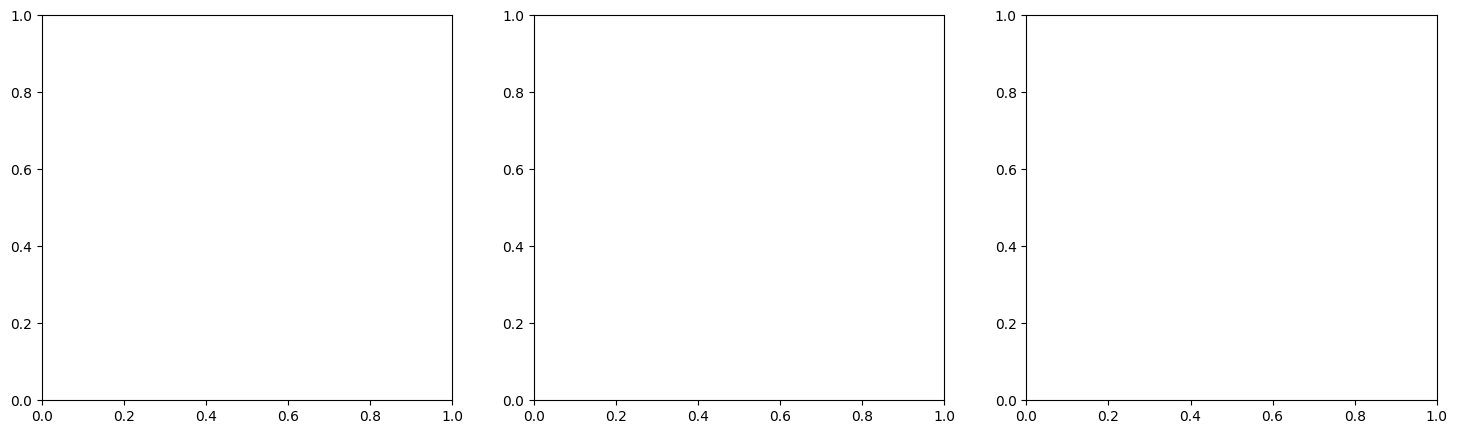

In [9]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Assuming X has three features, you can visualize decision boundaries for all three features
_, axs = plt.subplots(ncols=3, figsize=(18, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=tf.feature_names[0],
        ylabel=tf.feature_names[1],
        feature_index=[0, 1],  # Include first two features
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        tf.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()